# Support Vector Machines

 A powerful and versatile machine learning model, capable of performing linear
 or nonlinear classification, regression, and even novelty detection. SVMs shine with small to medium-sized
 nonlinear datasets (i.e., hundreds to thousands of instances), especially for classification tasks. However, they
 don’t scale very well to very large datasets

## Linear SVM Classification

Involves linear separation of classes with linear hyperplane to form margins Depending on nature and choices of the model.
Here Decision boundary is fully determined by instances located on edges(ie. Support Vectors)

### Soft Margin Classification

 If we strictly impose that all instances must be off the street and on the correct side, this is called hard margin
 classification. 
 There are two main issues with hard margin classification 
 First, it only works if the data is linearly
 separable. 
 Second, it is sensitive to outliers.

 To avoid these issues, we need to use a more flexible model. The objective is to find a good balance between
 keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of
 the street or even on the wrong side). This is called soft margin classification.

 When creating an SVM model using Scikit-Learn, you can specify several hyperparameters, including the
 regularization hyperparameter C. 
 Too low value of C = Underfitting and Too high value of C = Overfitting, So the value of C needs to be adjusted for optimal performance.

In [1]:
"""The code below Loads the iris dataset and trains a linear SVM classifier to detect "Iris virginica" flowers"""
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


In [2]:
iris = load_iris(as_frame=True)
x = iris['data']
y = iris['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [3]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, random_state=50))
svm_clf.fit(x, y)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=50))])

In [4]:
x_new = [[5.5, 1.7, 2.3, 4.0], [5.0, 1.5, 2.5, 4.99]]
svm_clf.predict(x_new)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2, 2])

In [5]:
svm_clf.decision_function(x_new)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-3.94752057, -2.0785601 ,  3.56392294],
       [-5.02901004, -2.67705726,  6.20452467]])

## Nonlinear SVM Classification

One approach to handling nonlinear datasets is to add more features, such as polynomial
 features. 
 

To implement this idea using Scikit-Learn, you can create a pipeline containing a PolynomialFeatures
 transformer (discussed in “Polynomial Regression”), followed by a StandardScaler and a LinearSVC
 classifier. Let’s test this on the moons dataset, a toy dataset for binary classification in which the data points are
 shaped as two interleaving crescent moons. You can generate this dataset using the
 make_moons() function.

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [7]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=50)

polynomial_svm_clf = make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearSVC(C=10, max_iter=10_000, random_state=50))
polynomial_svm_clf.fit(x, y)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=50))])

### Polynomial Kernel

 Adding polynomial features is simple to implement and can work great with all sorts of machine learning
 algorithms (not just SVMs). That said, at a low polynomial degree this method cannot deal with very complex
 datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow.

 Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the kernel trick. 
  The kernel trick makes it possible to get the same result as if you had
 added many polynomial features, even with a very high degree, without actually having to add them. Lets Test!

In [8]:
from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

#### TIP:

 Although hyperparameters will generally be tuned automatically (e.g., using randomized search), it’s good to have a sense of what each
 hyperparameter actually does and how it may interact with other hyperparameters: this way, you can narrow the search to a much smaller
 space.

### Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function, which
 measures how much each instance resembles a particular landmark.

You may wonder how to select the landmarks. The simplest approach is to create a landmark at the location of
 each and every instance in the dataset. 

### Gaussian RBF Kernel

 Just like the polynomial features method, the similarity features method can be useful with any machine learning
 algorithm, but it may be computationally expensive to compute all the additional features (especially on large
 training sets).

 Once again the kernel trick does its SVM magic, making it possible to obtain a similar result as if
 you had added many similarity features, but without actually doing so. Let’s try the SVC class with the Gaussian
 RBF kernel

In [9]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel='rbf', gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(x, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

#### TIP:

 With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear kernel
 first. The LinearSVC class is much faster than SVC(kernel="linear"), especially if the training set is very large. If it is not too
 large, you should also try kernelized SVMs, starting with the Gaussian RBF kernel; it often works really well. Then, if you have spare time
 and computing power, you can experiment with a few other kernels using hyperparameter search. If there are kernels specialized for your
 training set’s data structure, make sure to give them a try too.

### SVM Classes and Computational Complexity

 The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear
 SVMs.  It does not support the kernel trick, but it scales almost linearly with the number of training instances and
 the number of features.
  Its training time complexity is roughly O(m × n). The algorithm takes longer if you require
 very high precision. This is controlled by the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most
 classification tasks, the default tolerance is fine.

 The SVC class is based on the libsvm library, which implements an algorithm that supports the kernel trick.  The
 training time complexity is usually between O(m × n) and O(m × n). Unfortunately, this means that it gets
 dreadfully slow when the number of training instances gets large (e.g., hundreds of thousands of instances), so this
 algorithm is best for small or medium-sized nonlinear training sets. It scales well with the number of features,
 especially with sparse features (i.e., when each instance has few nonzero features). In this case, the algorithm
 scales roughly with the average number of nonzero features per instance.

 The SGDClassifier class also performs large margin classification by default, and its hyperparameters
especially the regularization hyperparameters (alpha and penalty) and the learning_rate–can be adjusted
 to produce similar results as the linear SVMs. For training it uses stochastic gradient descent  which allows incremental learning and uses little memory, so you can use it to train a model on a large dataset that
 does not fit in RAM (i.e., for out-of-core learning). Moreover, it scales very well, as its computational complexity
 is O(m × n).

## SVM Regression

 To use SVMs for regression instead of classification, the trick is to tweak the objective: instead of trying to fit the
 largest possible street between two classes while limiting margin violations, SVM regression tries to fit as many
 instances as possible on the street while limiting margin violations (i.e., instances off the street).

 The width of the
 street is controlled by a hyperparameter, ϵ(epsilon).
  Reducing ϵ increases the number of support vectors, which regularizes the model. Moreover, if you add more
 training instances within the margin, it will not affect the model’s predictions; thus, the model is said to be ϵ
insensitive.

In [10]:
from sklearn.svm import LinearSVR

svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, random_state=50))
svm_reg.fit(x, y)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=50))])

In [11]:
""" To tackle nonlinear regression tasks, you can use a kernelized SVM model.
 The following code uses Scikit-Learn’s SVR class (which supports the kernel 
 trick) to produce the model represented on the left"""
 
from sklearn.svm import SVR
svm_poly_reg = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

#### NOTE:

SVMs can also be used for novelty detection.

## Under the Hood of Linear SVM Classifiers

Continues Soon..................

# Exercise


In [61]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(50)
m = 100 # Number of instances
x = np.random.randn(m, 1) # Column vector
a = 2 * np.random.randn(m, 1)
x_a = (a + x) / 2
y_b = (b + y) / 2
b = 3 * a + np.random.randn(m, 1)
y = 4 + 3 * x + np.random.randn(m, 1)


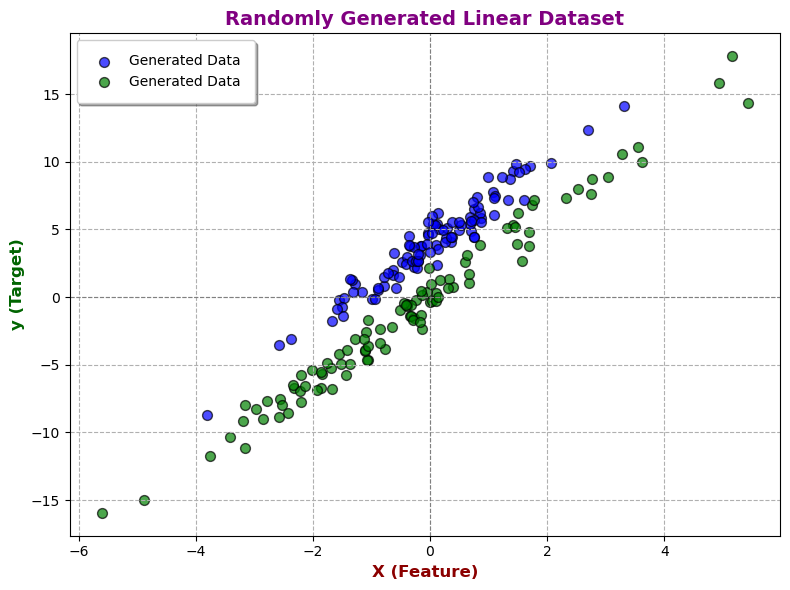

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Generated Data", s=50, alpha=0.7, edgecolors='black')
plt.scatter(a, b, color="green", label="Generated Data", s=50, alpha=0.7, edgecolors='black')
# plt.plot(x_a, y_b, 'r-', label='separation line')
plt.xlabel("X (Feature)", fontsize=12, fontweight="bold", color='darkred')
plt.ylabel("y (Target)", fontsize=12, fontweight="bold", color='darkgreen')
plt.title("Randomly Generated Linear Dataset", fontsize=14, fontweight="bold", color='purple')
plt.legend(loc='upper left', fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', alpha=1)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color='gray', linestyle="--", linewidth=0.8)

# Set the axis limits
"""
plt.xlim(0.00, 4.00)
plt.ylim(0, 14)
"""

plt.tight_layout() # Ensures everything fits well
plt.show()

In [65]:
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine(as_frame=True)
wine
print(len(wine.target))
print(len(wine.data))


178
178


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [108]:
x = wine.data
y = wine.target_names[wine.target] == 'class_0'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [109]:
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=10, random_state=50))
model = svm_clf.fit(x_train, y_train)

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [120]:
prediction = model.predict(x_test)
# print(prediction)
# print(y_test)

error = 0
for test in range(len(y_test)):
    if (prediction[test] != y_test[test]):
        print('Mixx')
        error += 1
    elif(prediction[test] != y_test[test]):
        print("Yas")
        


In [ ]:
"""
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, prediction, squared=False)
rmse
"""

'from sklearn.metrics import mean_squared_error\nrmse = mean_squared_error(y_test, prediction, squared=False)\nrmse'